# **Download dataset St.Lucia from Google Drive**

In [ ]:
from google.colab import drive
import os
import sys, os

if not os.path.isfile('/content/st_lucia.zip'):
    !gdown --id 1nEmjnEePTQNdB0JdKFE8ISJMcfbZMPPZ
    !jar xvf  "/content/st_lucia.zip"

if not os.path.isdir('/content/st_lucia'):
    print("Dataset St.Lucia doesn't exist")

# **Explore the St.Lucia dataset**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler
import plotly.graph_objects as go

**Count images in each set**

In [ ]:
dir = "/content/st_lucia/images/"
folders = ['test']
subfolders = ['database', 'queries']

matrix = []
for f in folders:
    submatrix = []
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        number_files = len(files)
        submatrix.append(number_files)
    matrix.append(submatrix)

pd.DataFrame(matrix, columns = subfolders, index = folders)

,database,queries
test,1549,1464


**Plot data distribution** 
<br/><br/>
We want to understand how dense it is and the distribution of the labels

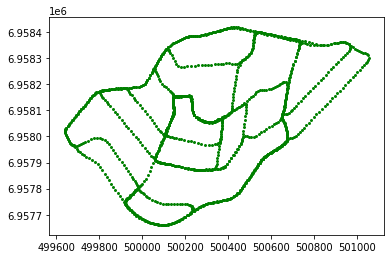

In [ ]:
subfolders = ['database']
fig, ax = plt.subplots()
custom_cycler=(cycler(color=['g','b']))
ax.set_prop_cycle(custom_cycler)
for f in folders:
    for sf in subfolders:
        UTM_easting = []
        UTM_northing = []
        UTM = np.array([(name.split("@")[1], name.split("@")[2]) for name in os.listdir(dir+f+"/"+sf+"/")]).astype(float)
        ax.scatter(UTM[:,0], UTM[:,1], marker='.', linewidth=0)
plt.savefig("lucia.png", dpi=1200)

**Print some images**

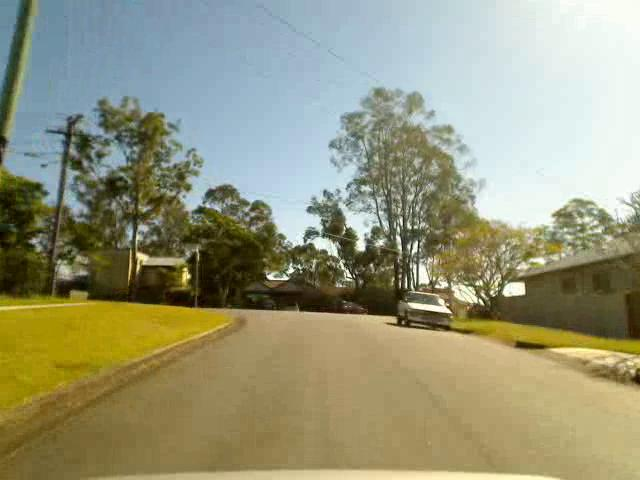

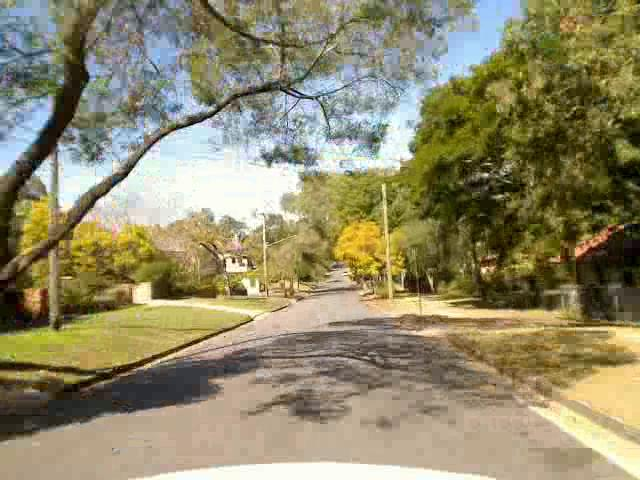

<Figure size 1800x288 with 0 Axes>

In [ ]:
from random import sample
from IPython.core.display import Image, display

subfolders = ['database', 'queries']
fig = plt.figure(figsize=(25, 4))
for f in folders:
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        random_image = sample(files,1)  
        display(Image(filename=dir+f+"/"+sf+"/"+random_image[0]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_data(path):
    if not(os.path.isdir(path)):
        raise RuntimeError("Unknown path")
    coords = {}
    paths = ['train', 'test', 'val']
    for p in paths:   
        img_path = path + p +'/database'
        if os.path.isdir(img_path):
            coords[p] = None
            for f in os.listdir(img_path):
                fields = f.split('@')
                lat, long = float(fields[6]), float(fields[5])
                if coords[p] is None:
                    coords[p] = np.array([lat,long])
                else:
                    coords[p] = np.vstack([coords[p], np.array([lat,long])])
    return coords, stats(coords)

def stats(coords):
    vett = None
    for t in coords:
        if vett is None:
            vett = coords[t]
        else:
            vett= np.vstack([vett, coords[t]])
    max_x = vett[:,0].max()
    max_y = vett[:,1].max()
    min_x = vett[:,0].min()
    min_y = vett[:,1].min()
    return (min_x, max_x, min_y, max_y)

def print_img(base_path, coords, bbox, out):
    plt.figure()
    img = plt.imread(base_path)
    fig, ax = plt.subplots(figsize=(8,7))
    labels = []
    for t in coords:
        x = coords[t][:,0]
        y = coords[t][:,1]
        ax.scatter(x,y, alpha=1, s=5)
        labels.append(t)
    ax.legend(labels)
    ax.set_xlim(bbox[0], bbox[1])
    ax.set_ylim(bbox[2], bbox[3])
    ax.imshow(img, zorder=0,extent = bbox, aspect= 'equal')
    plt.savefig(out)


        
'''
if __name__=='__main__':
    path = '/content/pitts30k/images/'
    coords, s = load_data(path)
    print(s)
    print_img(constants.DRIVE_PATH+'img/pitts.png',coords, s, constants.DRIVE_PATH+'img/pitts_out.png')
'''

"\nif __name__=='__main__':\n    path = '/content/pitts30k/images/'\n    coords, s = load_data(path)\n    print(s)\n    print_img(constants.DRIVE_PATH+'img/pitts.png',coords, s, constants.DRIVE_PATH+'img/pitts_out.png')\n"

(152.99634, 153.0107, -27.50471, -27.49787)


<Figure size 432x288 with 0 Axes>

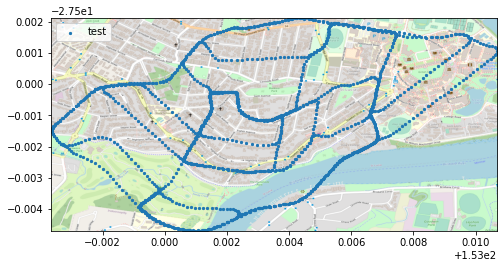

In [ ]:
path = '/content/st_lucia/images/'
coords, s = load_data(path)
print(s)
print_img('./map.png',coords, s, './a2.png')